# Predict the S&P500 💸

## Table of Contents:

* [Introduction](#1)
* [S&P500](#2)
* [Downloading & Cleaning Data](#3)
    * [Downloading S&P500 Price Data](#3.1)
    * [Cleaning and Visualising the Stock Market Data](#3.2)
    * [Create Target for Machine Learning](#3.3)
* [Training Initial Model](#4)
    * [Random Forest](#4.1)
    * [Initialise Random Forest Class](#4.2)
    * [Split Data: Train & Test](#4.3)
    * [Predictors](#4.4)
    * [Fit the Model](#4.5)
    * [Performance](#4.6)
    * [Plot Predictions vs Actuals](#4.7)
* [Building a Back-testing System](#5)
    * [Prediction Function](#5.1)
    * [Back-test Function](#5.2)
* [Adding Predictors to Model](#6)
* [Improving the Model](#7)
    * [Performance of Improved Model](#7.1)
* [Conclusion](#8)
    * [Suggested Next Steps](#8.1)

## Introduction 📈 <a class="anchor" id="1"></a>

Welcome to this machine learning project with **Python**!

In this project, we will be predicting the stock market using Machine Learning. Specifically, we will be trying to predict when the stock S&P500 Index price will increase in value. 

To begin, we will download data on the S&P500 Index prior to cleaning the data and then using it to train a machine learning model. Finally, we will do back-testing to assess the performance of our model, and aim to improve this performance with additional predictors.

## S&P500 📈 <a class="anchor" id="2"></a>

The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the stock performance of **500 large companies** listed on stock exchanges in the United States. It is one of the most commonly followed equity indices.

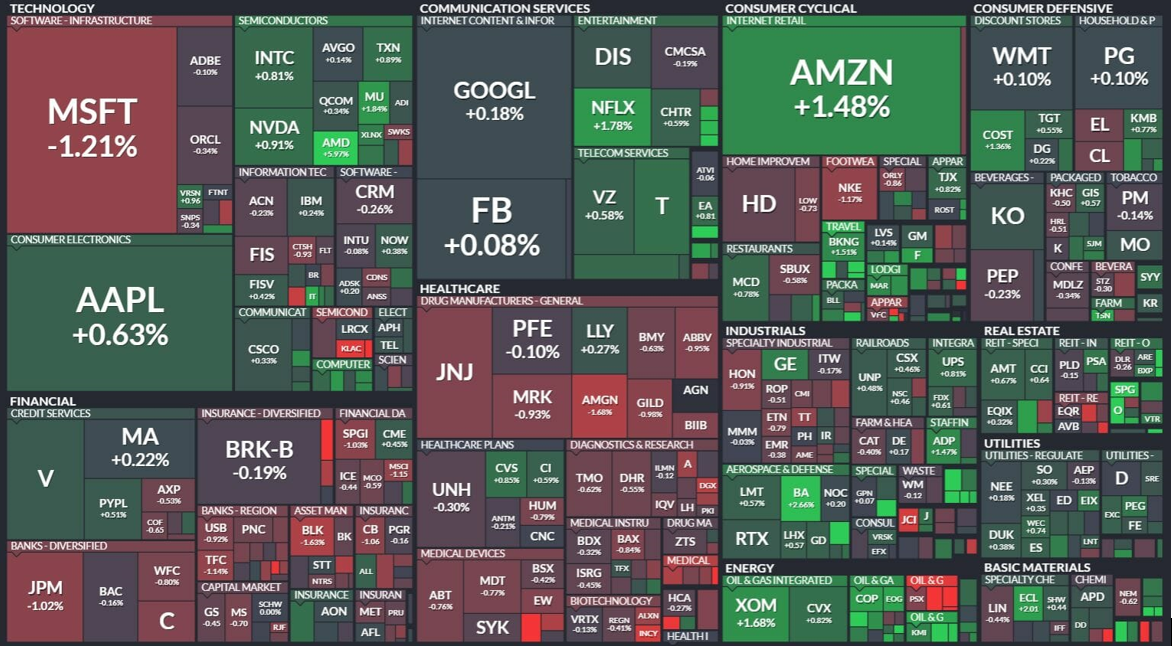

## Downloading & Cleaning Data 📈 <a class="anchor" id="3"></a>

### Downloading S&P500 Price Data 📈 <a class="anchor" id="3.1"></a>

We will be using the **yfinance** package in *Python*. Importing this package calls the **Yahoo Finance API** to download daily stock and index prices.

In [1]:
import yfinance as yf

After importing the yfinance package, we are going to initialise a Ticker class which will allow us to download price history for a single symbol. For the S&P500 Index, the symbol of **GSPC**.

In [2]:
sp500 = yf.Ticker("^GSPC")

Now, we are going to query the historical prices using the **.history( )** method. Passing the argument **period="max"** to this method will query data from when the index was first created. Doing this gives us pandas data frame.

In [3]:
sp500 = sp500.history(period="max")

# Display data frame
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,0,0
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,0,0
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,0,0


In the above data frame, each row represents a single trading day. The columns that we will be using to train our initial model are:

- **Open** - Opening price
- **High** - Highest price during the day
- **Low** - Lowest price during the day
- **Close** - Closing price
- **Volume** - Total volume of trades that day

The remaining two columns will not be used and will be dropped later on.

The **Date** column on the left is the index column. Inspecting this index column reveals that we have a **DateTimeIndex**:

In [4]:
# Inspect data frame index 
sp500.index

DatetimeIndex(['1950-01-03 00:00:00-05:00', '1950-01-04 00:00:00-05:00',
               '1950-01-05 00:00:00-05:00', '1950-01-06 00:00:00-05:00',
               '1950-01-09 00:00:00-05:00', '1950-01-10 00:00:00-05:00',
               '1950-01-11 00:00:00-05:00', '1950-01-12 00:00:00-05:00',
               '1950-01-13 00:00:00-05:00', '1950-01-16 00:00:00-05:00',
               ...
               '2023-02-10 00:00:00-05:00', '2023-02-13 00:00:00-05:00',
               '2023-02-14 00:00:00-05:00', '2023-02-15 00:00:00-05:00',
               '2023-02-16 00:00:00-05:00', '2023-02-17 00:00:00-05:00',
               '2023-02-21 00:00:00-05:00', '2023-02-22 00:00:00-05:00',
               '2023-02-23 00:00:00-05:00', '2023-02-24 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=18406, freq=None)

### Cleaning and Visualising the Stock Market Data 📈 <a class="anchor" id="3.2"></a>

First, we will plot the closing price (**Close**) against the index (**Date**) to visualise the historical trend of the index.

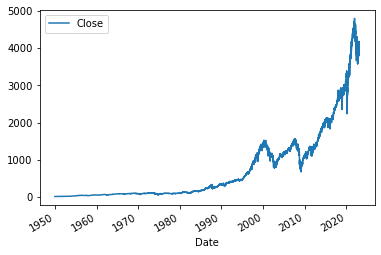

In [5]:
sp500.plot.line(y="Close", use_index=True);

It can be observed that the trend is near-exponential, with very rapid price increased in the 2000s and 2010s.

Now, we will delete the **Dividends** and **Stock Splits** columns, as we will not be using them.

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000


### Create Target for Machine Learning 📈 <a class="anchor" id="3.3"></a>

We need a variable that we will be predicting using our model. In machine learning applications, this is called the **target**, whereas predictors are often referred to as **features** of the data set.

The target variable will indicate whether or not the SP500 Index price will increase or decrease after a day of trading. We will do this by creating a column called **Tomorrow**; we will create this by using the **.shift( )** method to *shift* the **Close** prices back one day. Ideally, we want to know if we buy S&P500 stock on day 1 if the price of that stock will increase on day 2.

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

# Display data frame
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,3997.340088
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,3991.050049
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,4012.320068


To create our **Target** variable, we need to compare the closing price on one day with the closing price on the following day. In our **Target** column, a price rise will be indicated by a $1$, otherwise $0$.

In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,3997.340088,0
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,3991.050049,0
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,4012.320068,1


Typically, the more data the better, when it comes to training machine learning algorithms. However, with financial market data there is a risk that some of the economic/ market fundamentals may have shifted since records began, rendering earlier data less useful in training a model to make future predictions.

For example, the 1980s saw the breakthrough of **free-market economic policies** including financial and environmental deregulation, increased free trade, and the watering-down of antitrust enforcement.

To insure against the risk that changing fundamentals may affect our model's predictive accuracy, we will drop observations prior to 1990.

In [10]:
sp500 = sp500.loc["1990-01-01":].copy()

The **.copy( )** method was used as sometimes an error can arise if assigning back to a subsetted data frame.

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,3997.340088,0
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,3991.050049,0
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,4012.320068,1


## Training Initial Model 📈 <a class="anchor" id="4"></a>

### Random Forest 📈 <a class="anchor" id="4.1"></a>

A random forest model works by training individual decision trees with randomised parameters prior to averaging the results from those decision trees (see below). Random forests are resistant to over-fitting, they also tend to run relatively quickly, and they can pick up non-linearities in the data. For example, the opening price is not linearly correlated with **Target**.

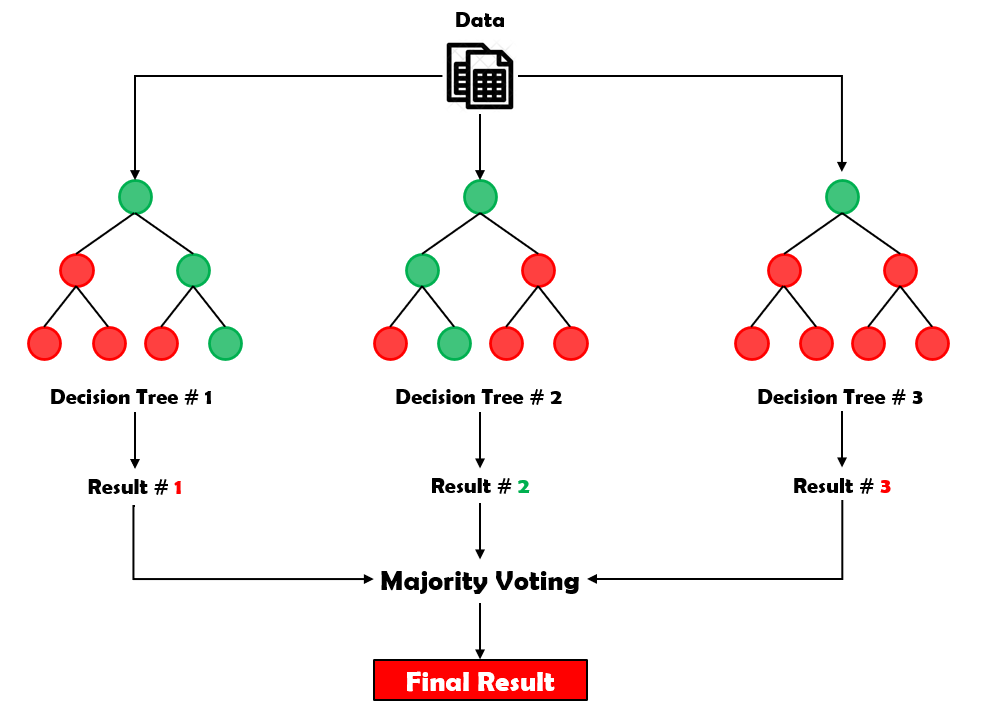

### Initialise Random Forest Class 📈 <a class="anchor" id="4.2"></a>

When initialising our model, we will set the following parameters:

- **n_estimators** - Number of Decision Trees used in forest
- **min_samples_split** - Specifies minimum number of samples required to split an internal node (prevents over-fitting)
- **random_state** - Sets seed

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialise model
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

### Split Data: Train & Test 📈 <a class="anchor" id="4.3"></a>

We will now split our data into **training** and **testing** sets. As we are using time-series data, **cross-validation (CV)** will NOT be used. Using CV on time series data may lead to great training results but pretty terrible testing results; this is because CV does not take the time-series nature of the data into account, and thus could result in using *future* data to predict *past* data. This is referred to as **leakage**.

For example, if I wanted to predict whether the price would increase from - for example - the $1^{\text{st}}$ February 2008 to the $2^{\text{nd}}$ February 2008, it would help me if I knew that the price on the $3^{\text{rd}}$ February 2008 was greater than on the $1^{\text{st}}$. If that was the case, I would assign a greater probability to the price *increasing* on the $2^{\text{nd}}$ than to it decreasing. In the real-world, we do not have the privilege of seeing into the future, so it makes no sense to train our model as if it will have this ability, either.

To split the data, we will put all but the last 100 rows of the data into the training set.

In [13]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

### Predictors 📈 <a class="anchor" id="4.4"></a>

Now, we will create a list of the predictors that we will use to train our model.

In [14]:
predictors = ["Close", "Volume", "Open", "High", "Low"]

### Fit the Model 📈 <a class="anchor" id="4.5"></a>

In [15]:
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

### Performance 📈 <a class="anchor" id="4.6"></a>

To assess the performance of our model, we will use the **precision** metric. The precision is the proportion of **True Positives (TP)** relative to the sum of True Positives *and* False Positives:

$$\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

In this use-case, it represents the proportion of time that the index price went up *given that* we predicted it to go up. 

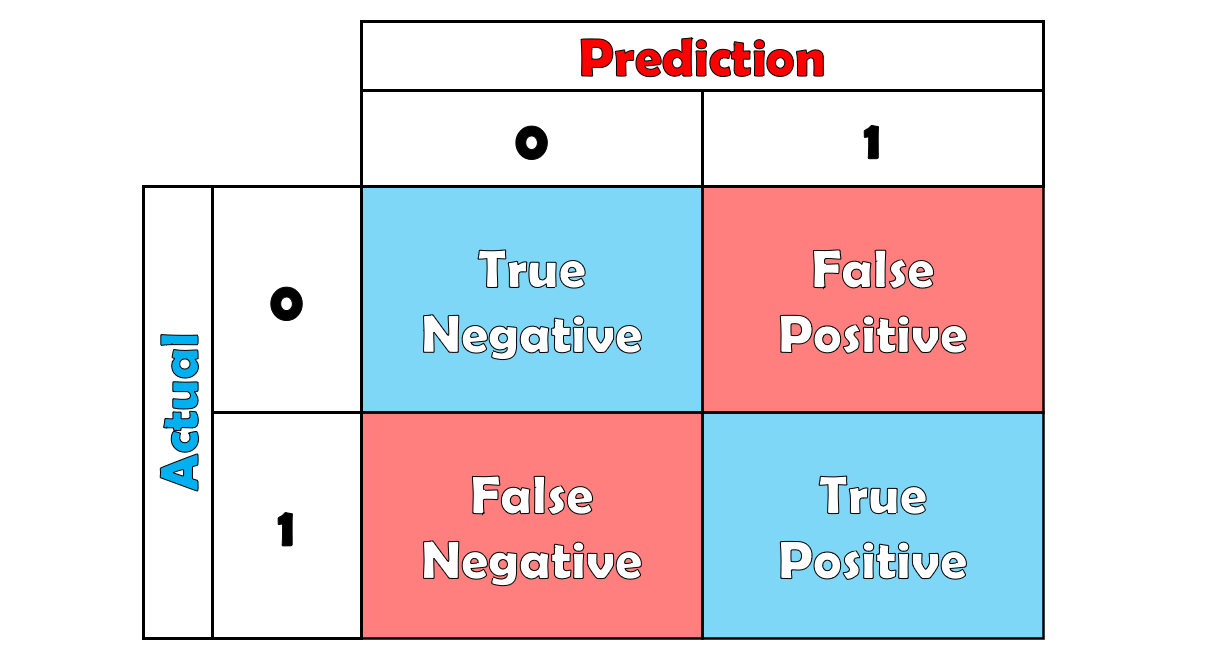

In [16]:
# Import precision metric
from sklearn.metrics import precision_score

Now, we generate predictions using our predictors.

In [17]:
preds = model.predict(test[predictors])

This generates an array of predictions. This is not wholly useful, so we will convert this into a pandas **Series**.

In [18]:
# Display predictions
preds

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [19]:
import pandas as pd

# Convert to Series
preds = pd.Series(preds, index=test.index)

# Display Series
preds

Date
2022-10-03 00:00:00-04:00    0
2022-10-04 00:00:00-04:00    1
2022-10-05 00:00:00-04:00    1
2022-10-06 00:00:00-04:00    1
2022-10-07 00:00:00-04:00    1
                            ..
2023-02-17 00:00:00-05:00    1
2023-02-21 00:00:00-05:00    1
2023-02-22 00:00:00-05:00    1
2023-02-23 00:00:00-05:00    1
2023-02-24 00:00:00-05:00    1
Length: 100, dtype: int32

Finally, we will calculate the **precision score** by comparing whether the index price actual increased with our predictions.

In [20]:
precision_score(test["Target"], preds)

0.34328358208955223

This means that when we predicted that the index would increase, we were correct $34.3\%$ of the time. This is not very good.

### Plot Predictions vs Actuals 📈 <a class="anchor" id="4.7"></a>

To plot our predictions, we will combine them with our actual values using the **.concat( )** method. Setting the *axis* parameter to $1$ means that both inputs will be treated as columns.

In [21]:
combined = pd.concat([test["Target"], preds], axis=1)

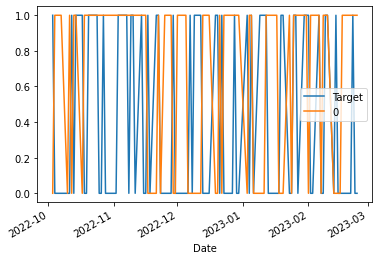

In [22]:
combined.plot();

We can see above that when we predicted the index price to increase, it mostly went down. Not good!

## Building a Back-testing System 📈 <a class="anchor" id="5"></a>

Currently, we are only testing against the last 100 days of index data. We want to be testing against across multiple years of data to see how the algorithm performs in different periods.

To achieve this, we will be performing **back-testing**. To set up back-testing, we start by creating a prediction function that will contain all of the steps that we have just performed, and then a back-test function that will nest our prediction function.

### Prediction Function 📈 <a class="anchor" id="5.1"></a>

In [23]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

### Back-test function 📈 <a class="anchor" id="5.2"></a>

We will now create a back-test function. This function will take - among others - two arguments: **start** and **step**. 

When we train our model, we will want a certain amount of data to train the initial model. In each trading year, there are approximately **250** trading days (as trades do not occur on the weekend). So, a **start** value of 2500 equates to taking around 10 years worth of data to train the initial model.

The **step** argument allows us to train more models using data from a subsequent time period. For example, suppose that we set **start** to 2500, we will train our initial model using the first 10 years of data and predict prices for the 11th year; with a step size of **250**, we will train our next model using approximately 11 years of data, and then predict the 12th year prices, and so on.

By doing this, we will generate predictions for a lot of different years which will hopefully provide us with greater confidence in our model.

Our **back-test function** includes:

1. Create list of data frames where each data frame will contain predictions for a single year
2. Loop through data year-by-year
3. Split training and testing data
4. Generate predictions
5. Append list of data frames
6. Concatenate all predictions together

In [24]:
def backtest(data, model, predictors, start=2500, step=250):
    
    # (1) - Create list of prediction data frames
    all_predictions = []

    # (2) - Loop through data
    for i in range(start, data.shape[0], step):
        
        # (3) - Split into training and testing sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        
        # (4) - Generate predictions
        predictions = predict(train, test, predictors, model)
        
        # (5) - Append list
        all_predictions.append(predictions)
    
    # (6) - Concatenate predictions
    return pd.concat(all_predictions)

In [25]:
predictions = backtest(sp500, model, predictors)

Using the **.value_counts( )** method, we can see how many days we predicted the index price would go up versus how many times we predicted it would go down.

In [26]:
predictions["Predictions"].value_counts().to_frame()

,Predictions
0,3401
1,2451


Now, we can look at our **precision score**.

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5275397796817626

We have a score of $52.8\%$ which, while not fantastic, is a significant improvement on $34.3\%$. As a bench-mark, we can assess this against the number of days that the market actually increased in price.

In [28]:
prop = predictions["Target"].value_counts() / predictions.shape[0]
prop.to_frame().rename(columns={"Target":"Proportion"})

,Proportion
1,0.533664
0,0.466336


In the days that we looked at, the S&P500 actually increased in price $53.4\%$ of days, and went down in price $46.6\%$ of days.

Unfortunately, this suggests that should our strategy just be to randomly buy stock at in one day and selling in the next, we may have been marginally better-off than using our algorithm.

## Adding Predictors to Model 📈 <a class="anchor" id="6"></a>

We will now add predictors to our model to try and improve its precision score.

We will create some **rolling averages**. These can be useful as they incorporate the performance of the index in time periods prior to the day you are want to predict. To do this, we will create a list called **horizons** which will give us rolling averages across different *time horizons* of prior trading days to that which we are looking to predict.

We will loop through each time horizon in our list using a *for loop*. This will:

1. Create **new_predictors** list
2. Loop through each time horizon in our list
3. Create a rolling average for each time horizon
4. Create closed ratios and add these to our data frame
5. Create a trend column for the last $x$ days when the price actually went up
6. Add these new columns to our **new_predictors** list

In [29]:
# Horizons - 2 prior trading days, 5 prior trading days, so on
horizons = [2,5,60,250,1000]

# (1) - Create new predictors list
new_predictors = []

# (2) - Loop through each time horizon
for horizon in horizons:
    
    # (3) - Create rolling average 
    rolling_averages = sp500.rolling(horizon).mean()
    
    # (4) - Create closed ratios
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    # (5) - Create price trends
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    # (6) - Add new predictors to list
    new_predictors+= [ratio_column, trend_column]

In [30]:
# See missing values
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we are not able to create a rolling average for some entries, it will generate missing values for those entries, as you can see above. Let's drop these missing values, as machine learning algorithms do not process them very well.

In [31]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [32]:
sp500.head(5)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


## Improving Model 📈 <a class="anchor" id="7"></a>

We will improve our model initially by updating some of our parameters. To do this, we will increase the number of Decision Trees to 200 (**n_estimators**) while also reducing the minimum number of samples required to split a node to $50$ (**min_samples_split**).

In [33]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

We will also be a little bit more sophisticated in terms of how the model defines the index increasing in price. To elaborate, we had previously been using the **model.predict( )** method to predict when the index price increased. This returns a value of 1 if $p\geq 0.5$ that the index will increase in price, $0$ otherwise.

Instead, we will use the **model.predict_proba( )** method. This will return a probability that the price will increase. We want to extract this probability and then apply a custom threshhold to the predicted probabilities. This will return a value of $1$ (i.e. a prediction that the index value increased) if the predicted probability is $p\geq 0.6$, $0$ otherwise.

In [34]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    
    # Extract probability that the price will increase from second column of preds
    preds = model.predict_proba(test[predictors])[:,1]
    
    # Set custom threshold
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    
    
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

To train this model, we will only be using the **new predictors**. This is because the other variables are absolute numbers, and hence do not really tell us much about future price movements. For example, if the opening price is $463.059998$, this does not tell us anything about whether the index price will increase or decrease.

In [35]:
predictions = backtest(sp500, model, new_predictors)

After training our model, we can once again see how many trading days we predicted that the index price would increase in versus the number of trading days that we predicted it would decrease.

In [36]:
predictions["Predictions"].value_counts().to_frame()

,Predictions
0.0,4039
1.0,813


It can be noted that the number of times we predicted that the market would increase is lower than in our prior model. This would suggest we would be making trades (buying and selling) on fewer days, but on those days that we did trade, we would be *more confident* that we would have correctly predicted the price movement of the index.

### Performance of Improved Model 📈 <a class="anchor" id="7.1"></a>

In [37]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5694956949569495

Our **precision** has increased to $56.9\%$ which is a marked improvement.

In [38]:
prop = predictions["Target"].value_counts() / predictions.shape[0]
prop.to_frame().rename(columns={"Target":"Proportion"})

,Proportion
1,0.543693
0,0.456307


We can see that the proportion of times that the index actually increased in value was $54.4\%$ of the time, hence our precision is marginally greater than our bench-mark, thus the model may be useful.

## Conclusion 📈 <a class="anchor" id="8"></a>

In this project, we downloaded stock price data from the S&P500 Index using the **yfinance** API. After this, we cleaned the data and created a simple visualisation to see its historical trend. We then filtered out data from the year 1990 onwards, to avoid fundamental shifts in markets that may affect our predictions.

Next, we built our initial machine learning model and assessed its predictive performance using the **precision**. This was not very good at only $34.3\%$. In fact, it would have led to a worse performance than simply randomly trading. Bad news!

We then created a **back-test** function to measure to measure our accuracy over longer periods of time. This improved our model's performance considerably.

Finally, we sought to improve our model by enriching our predictors. We achieved this with rolling averages and trends, and increasing the threshold our model used to denote a price change as positive or negative. This would lead to a lower number of days in which we traded, but on those days that we did trade, we would be more confident in our predictions.

Our final performance was $56.9\%$. Not incredible, but better than our benchmark value of $54.4\%$.

### Suggested Next Steps 📈 <a class="anchor" id="8.1"></a>

One way in which the model could be improved would be to use over-night exchanges. While the S&P500 Index only trades during US market hours, other indices open earlier; it may be an idea to correlate their performances with the S&P500. For example, if an indices that opens earlier than the S&P500 is increasing, will the S&P500 tend to increase also upon opening?

Economic metrics regarding inflation or interest rates could also be incorporated into the model, as these can affect consumer trends and business decisions, and - very importantly - **expectations** of future market prices. 

Key components of the S&P500 can also be incorporated into the model. For example, if the tech industry is in a downturn then this may negatively impact upon the S&P500 Index prices several months later.

Alternatively, the resolution can also be increased. This project looks at daily data, but data can be acquired on a more granular level, such as hourly or minite-by-minute data.